In [1]:
import pandas as pd
data= pd.read_csv('database\salaryData.csv')
print(data.head())
name = "giannis"
name = name.capitalize()
print(name)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\amans\AppData\Local\Temp\ipykernel_9900\713441980.py:2: SyntaxWarning: invalid escape sequence '\s'
  data= pd.read_csv('database\salaryData.csv')
C:\Users\amans\AppData\Local\Temp\ipykernel_9900\713441980.py:2: SyntaxWarning: invalid escape sequence '\s'
  data= pd.read_csv('database\salaryData.csv')


ModuleNotFoundError: No module named 'pandas'

In [16]:
import requests
import pandas as pd
from datetime import datetime
import unicodedata
data = pd.read_csv('mergedCheck.csv')
data.rename(columns={'2024-25': 'salary'}, inplace=True)
data['player_id'] = data['player_id'].astype(str)
data['pts'] = data['pts'] / data['gp']
data['ast'] = data['ast'] / data['gp']
data['reb'] = data['reb'] / data['gp']
data['min'] = data['min'] / data['gp']
# Normalize the player names in the dataset
def normalize_text(text):
    normalized_text = unicodedata.normalize('NFD', text)  # Decompose characters
    normalized_text = ''.join([c for c in normalized_text if not unicodedata.combining(c)])  # Remove accents
    return normalized_text.lower()


data['normalized_name'] = data['player_id'].apply(normalize_text)

# data['plus_minus'] = data['plus_minus'] / data['gp']
data['nba_fantasy_pts'] = data['nba_fantasy_pts'] / data['gp']
data = data.dropna(subset=['salary'])
data['salary'] = pd.to_numeric(data['salary'])
stats = ['gp_rank','min_rank','fgm_rank','fg_pct_rank','fg3a_rank','fg3_pct_rank','ft_pct_rank','reb_rank','ast_rank','tov_rank','stl_rank','pts_rank','nba_fantasy_pts_rank']
# for stat in stats:
#     bestPlayer = data[data[stat]==1]
#     print(stat,':',bestPlayer['player_id'].iloc[0])

nameInput=input("What NBA player would you like to analyze first?: ")
normalizedName = normalize_text(nameInput)
playerData = data[data['normalized_name'] == normalizedName]
playerData.to_csv('stat.csv')
playerData.to_excel('stat.xlsx')
# print(playerData['ast_rank'])
print(playerData)

     season_id   player_id player_name     team_id team_abbreviation   age  \
479    1629027  Trae Young        Trae  1610612737               ATL  26.0   

     gp   w   l  w_pct  ...  pfd_rank  pts_rank  plus_minus_rank  \
479  36  18  18    0.5  ...       406         7               14   

     nba_fantasy_pts_rank  dd2_rank  td3_rank  cfid  cfparams      salary  \
479                   148        10         6    26        11  43031940.0   

     normalized_name  
479       trae young  

[1 rows x 68 columns]


In [3]:
diamond = 5
elite = 10
gold = 25
silver = 50
bronze = 100

print(diamond/500)
print(elite/500)
print(gold/500)
print(silver/500)
print(bronze/500)

0.01
0.02
0.05
0.1
0.2


In [4]:
import pandas as pd
import numpy as np
import unicodedata



def normalize_text(text):
    normalized_text = unicodedata.normalize('NFD', text)  # Decompose characters
    normalized_text = ''.join([c for c in normalized_text if not unicodedata.combining(c)])  # Remove accents
    return normalized_text.lower()

# Get data from csv file and create updated dataframe: converting each stat to per game stat
data = pd.read_csv('mergedCheck.csv')
data.rename(columns={'2024-25': 'salary'}, inplace=True)
data['pts'] = data['pts'] / data['gp']
data['ast'] = data['ast'] / data['gp']
data['reb'] = data['reb'] / data['gp']
data['min'] = data['min'] / data['gp']
# Normalize the player names in the dataset
data['normalized_name'] = data['player_id'].apply(normalize_text)

# data['plus_minus'] = data['plus_minus'] / data['gp']
data['nba_fantasy_pts'] = data['nba_fantasy_pts'] / data['gp']
data = data.dropna(subset=['salary'])
data['salary'] = pd.to_numeric(data['salary'])

# selected_features = ['gp', 'age', 'pts', 'ast', 'reb', 'plus_minus', 'nba_fantasy_pts', 'min']
selected_features = ['gp', 'age', 'pts', 'ast', 'reb', 'nba_fantasy_pts', 'min']

# Get specified player data via User Input and Evaluate performance via contract
name=input("What NBA player would you like to analyze first?: ")
name = normalize_text(name)
playerData = data[data['normalized_name'] == name]
print(playerData)
data[data]



     season_id     player_id player_name     team_id team_abbreviation   age  \
331       2544  LeBron James      LeBron  1610612747               LAL  40.0   

     gp   w   l  w_pct  ...  pfd_rank  pts_rank  plus_minus_rank  \
331  33  18  15  0.545  ...       285        29               17   

     nba_fantasy_pts_rank  dd2_rank  td3_rank  cfid  cfparams      salary  \
331                   476        14        15     2        14  48728845.0   

     normalized_name  
331     lebron james  

[1 rows x 68 columns]


ValueError: Boolean array expected for the condition, not int64

In [15]:
name=input("What NBA player would you like to analyze first?: ")
print(name)



LeBron James


In [16]:
current_datetime = datetime.now()
month = current_datetime.month
print(month)

if month > 10:
    currentSeason = current_datetime.year
else:
    currentSeason = current_datetime.year - 1

startYr = str(currentSeason)
endYr = str(currentSeason+1)[-2:]

season_id = startYr + '-' + endYr
per_mode = 'Totals'

player_info_url='https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&ISTRound=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode='+per_mode+'&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season='+season_id+'&SeasonSegment=&SeasonType=Regular%20Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

headers  = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}



1


In [17]:
response = requests.get(url=player_info_url,headers=headers).json()
player_info = response['resultSets'][0]['rowSet']



columns_list = [
    'season_id',
    'player_id',
    'player_name',
    'team_id',
    'team_abbreviation',
    'age',
    'gp',
    'w',
    'l',
    'w_pct',
    'min',
    'fgm',
    'fga',
    'fg_pct',
    'fg3m',
    'fg3a',
    'fg3_pct',
    'ftm',
    'fta',
    'ft_pct',
    'oreb',
    'dreb',
    'reb',
    'ast',
    'tov',
    'stl',
    'blk',
    'blka',
    'pf',
    'pfd',
    'pts',
    'plus_minus',
    'nba_fantasy_pts',
    'dd2',
    'td3',
    'gp_rank',
    'w_rank',
    'l_rank',
    'w_pct_rank',
    'min_rank',
    'fgm_rank',
    'fga_rank',
    'fg_pct_rank',
    'fg3m_rank',
    'fg3a_rank',
    'fg3_pct_rank',
    'ftm_rank',
    'fta_rank',
    'ft_pct_rank',
    'oreb_rank',
    'dreb_rank',
    'reb_rank',
    'ast_rank',
    'tov_rank',
    'stl_rank',
    'blk_rank',
    'blka_rank',
    'pf_rank',
    'pfd_rank',
    'pts_rank',
    'plus_minus_rank',
    'nba_fantasy_pts_rank',
    'dd2_rank',
    'td3_rank',
    'cfid',
    'cfparams'
]


In [18]:
nba_df_p = pd.DataFrame(player_info,columns=columns_list)
nba_df_c = pd.DataFrame(player_info,columns=columns_list)
print(nba_df_c)

# nba_df_c = nba_df_c.shift(-1,axis=1)
nba_df_c.rename(columns={'plus_minus_rank': 'pm_rank'}, inplace=True)

     season_id        player_id player_name     team_id team_abbreviation  \
0      1630639      A.J. Lawson        A.J.  1610612761               TOR   
1      1631260         AJ Green          AJ  1610612749               MIL   
2      1642358       AJ Johnson          AJ  1610612749               MIL   
3       203932     Aaron Gordon       Aaron  1610612743               DEN   
4      1628988    Aaron Holiday       Aaron  1610612745               HOU   
..         ...              ...         ...         ...               ...   
510    1641744        Zach Edey        Zach  1610612763               MEM   
511     203897      Zach LaVine        Zach  1610612741               CHI   
512    1630192       Zeke Nnaji        Zeke  1610612743               DEN   
513    1630533  Ziaire Williams      Ziaire  1610612751               BKN   
514    1629627  Zion Williamson        Zion  1610612740               NOP   

      age  gp   w   l  w_pct  ...  blka_rank  pf_rank  pfd_rank  pts_rank  

In [12]:
stat = nba_df_c[nba_df_c['player_id'] == name]
unique_teams = stat['team_abbreviation'].unique()
print(unique_teams[0])

# Display unique teams
print(f"Player '{name}' is associated with the following teams: {unique_teams}")


LAL
Player 'LeBron James' is associated with the following teams: ['LAL']


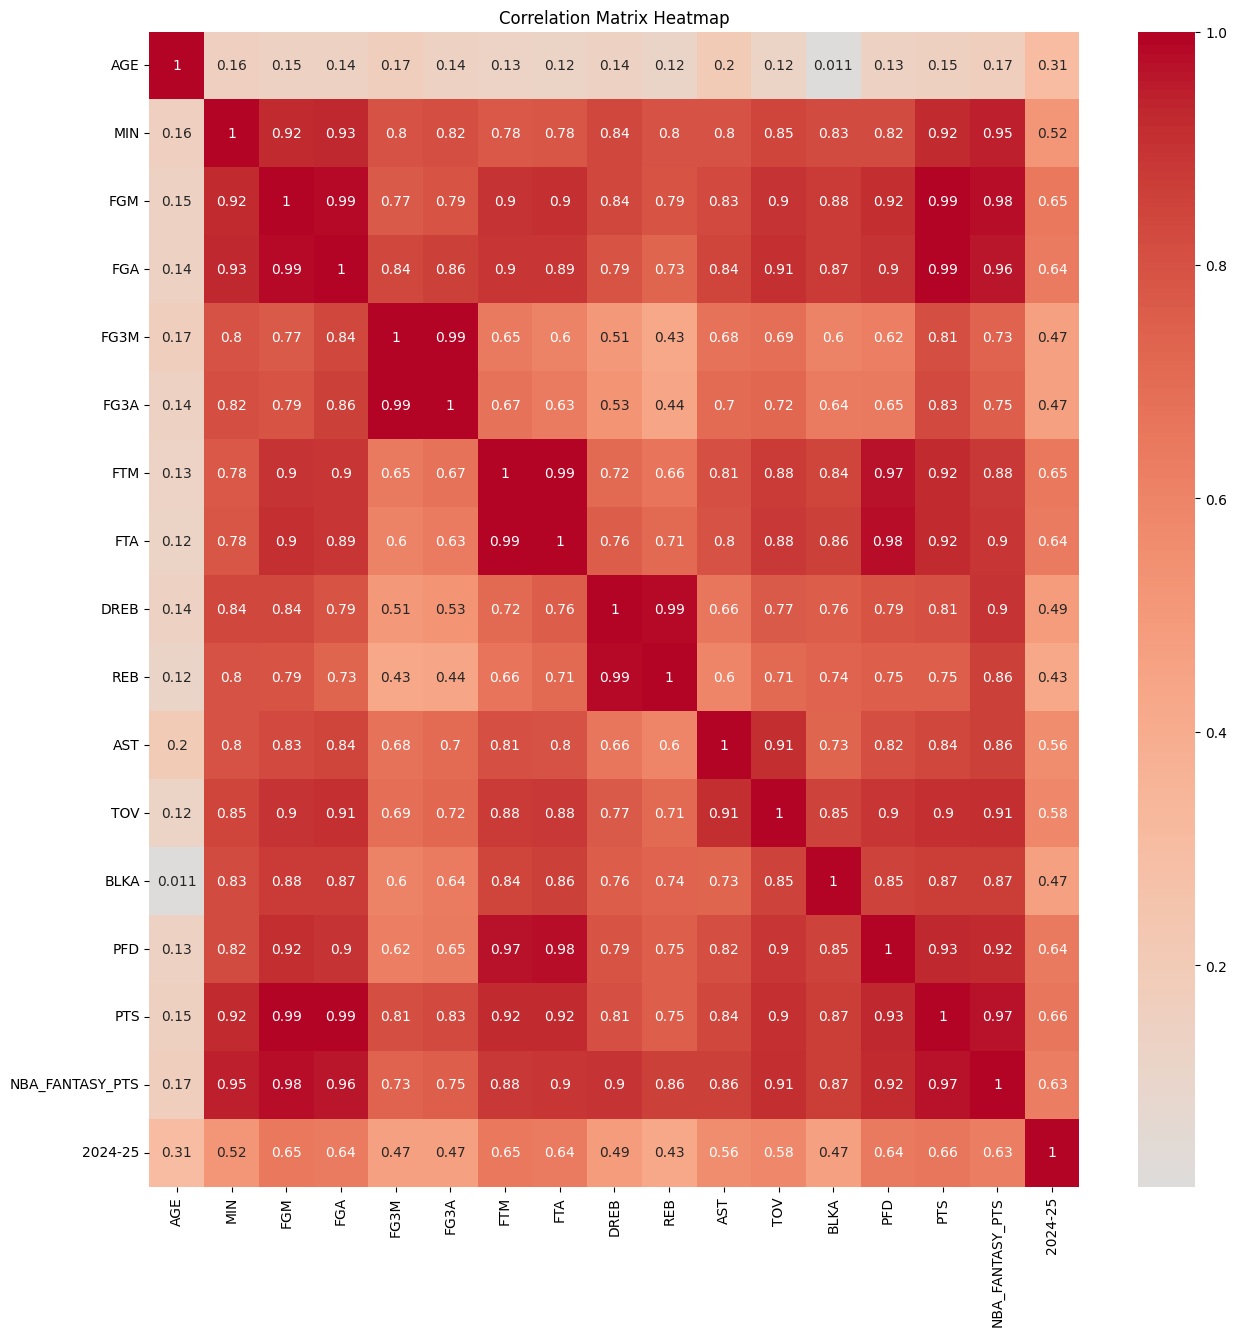

In [ ]:
# from webscrapeData import updateData

# updateData('2024-25')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('merged.csv')
df['2024-25'] = df['2024-25'].str.replace('[\$,]', '', regex=True).str.strip()
df['2024-25'] = df['2024-25'].astype(float)
df.head()
num_columns = ['MIN', 'FGM', 'FGA', 'FTM', 'FTA', 'AST',
       'TOV','PFD', 'PTS',
       'NBA_FANTASY_PTS', '2024-25']

corr = df[num_columns].corr(method = 'pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

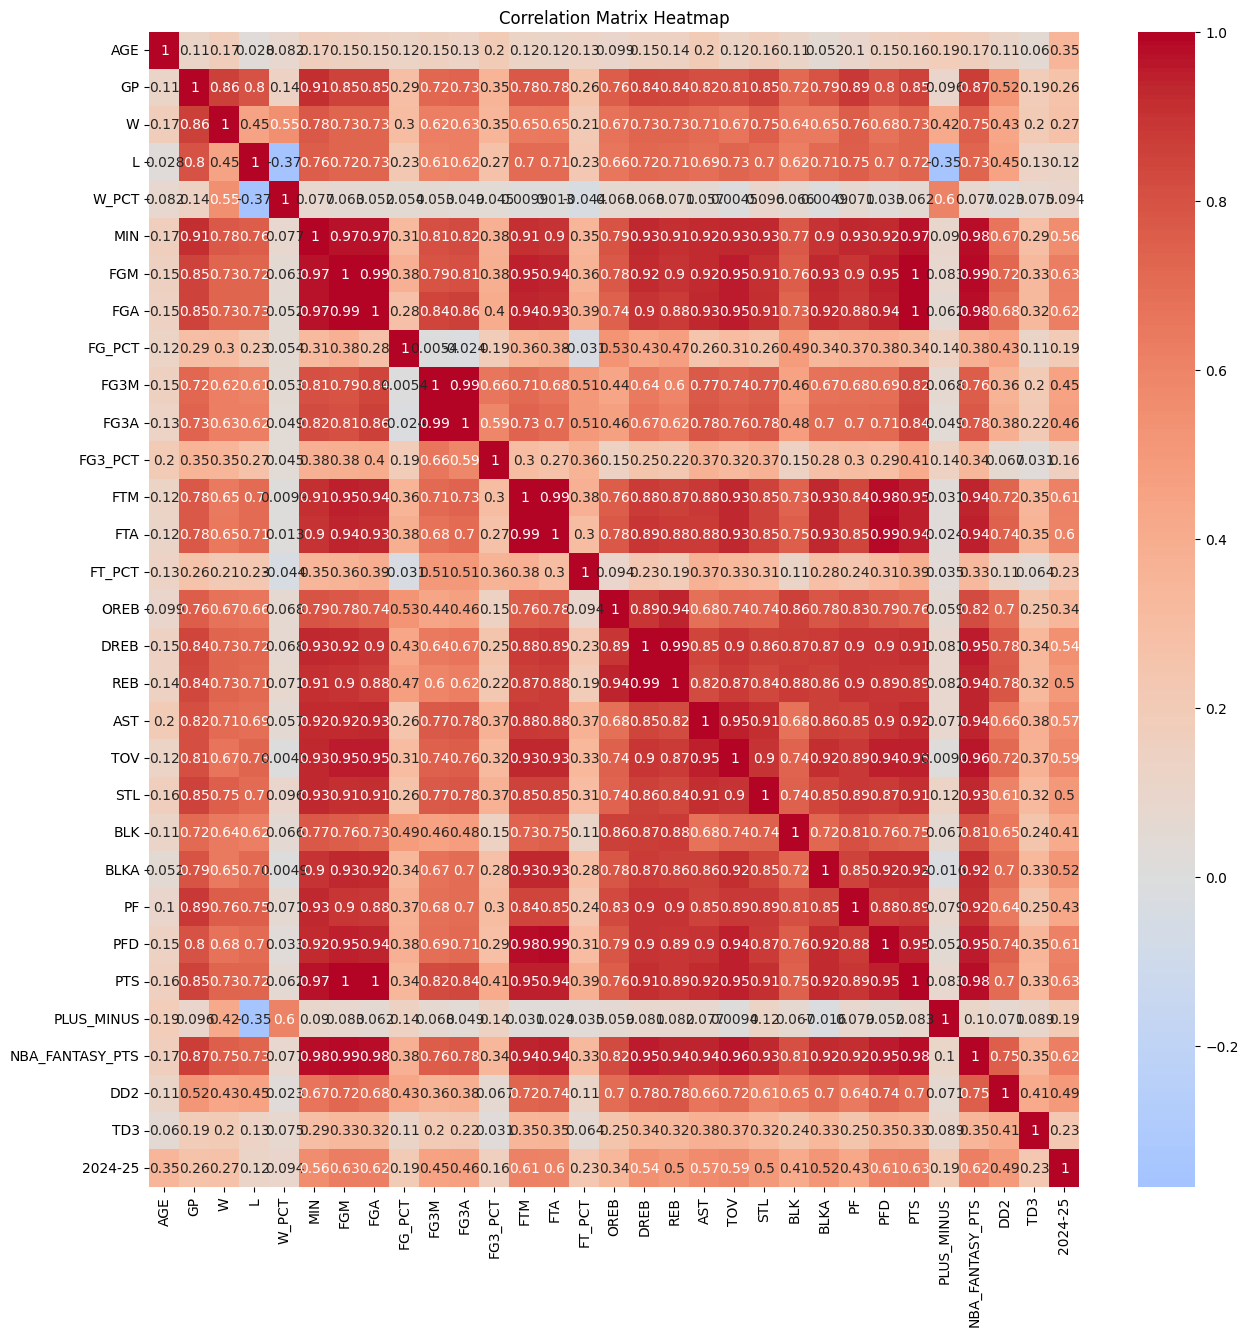

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('merged.csv')
df['2024-25'] = df['2024-25'].str.replace('[\$,]', '', regex=True).str.strip()
df['2024-25'] = df['2024-25'].astype(float)
df.head()
num_columns = ['AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', '2024-25']

corr = df[num_columns].corr(method = 'spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()